# Overfitting 

Valutazione dei modelli degli algoritmi di regressione con l'utilizzo di GraphLab Create



In [2]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

Crea valori randomici nell'intervallo [0,1]

In [3]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [4]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

Calcola la y = sin(4x)


In [5]:
y = x.apply(lambda x: math.sin(4*x))

In [6]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

In [7]:
data = graphlab.SFrame({'X1':x,'Y':y})


Aggiungi il rumore gaussiano alla y

In [8]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

### Inserisci i dati in un in un SFrame 

In [9]:
data_noise = graphlab.SFrame({'X1':x,'Y':y})


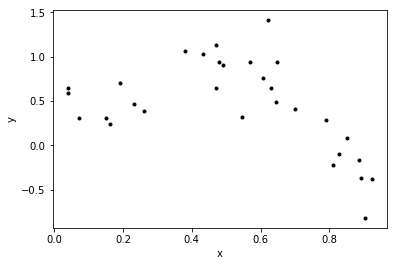

In [10]:
plot_data(data_noise)

### Stampa un grafico con i dati

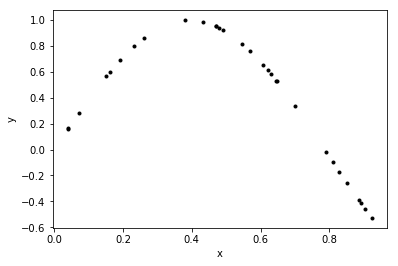

In [11]:
plot_data(data)

## Alcune funzioni per la polynomial regression 

Funzione per creare le nostre feature per un modello di regressione polinomiale di qualsiasi grado.

In [12]:
# data : SFrame di partenza, deg grado del polinomio 
def polynomial_features(data, deg):
    #copia dell' SFrame in un SFrame copia
    copy=data.copy()
    #creo una colonna per ogni grado del polinomio da 1 a deg
    for i in range(1,deg):
        copy['X'+str(i+1)]=copy['X'+str(i)]*copy['X1']
    return copy

In [13]:
copy =polynomial_features(data_noise,3)
copy

X1,Y,X2,X3
0.0395789449501,0.587050191026,0.00156649288336,6.20001355952e-05
0.0415680996791,0.648655851372,0.00172790691093,7.18258067099e-05
0.0724319480801,0.307803309485,0.00524638710267,0.000380006038229
0.150289044622,0.310748447417,0.0225867969334,0.0033945481322
0.161334144502,0.237409625496,0.0260287061823,0.00419931904442
0.191956312795,0.705017157224,0.0368472260218,0.00707305764388
0.232833917145,0.461716676992,0.0542116329729,0.0126223068599
0.259900980166,0.383260507851,0.0675485194911,0.0175559264245
0.380145814869,1.06517691429,0.144510840562,0.0549351912429
0.432444723508,1.03184706949,0.18700843889,0.0808708126494


Funzione per addestrare un modello di polynomial linear regression di grado deg sui dati "data"

# Funzione con GraphLab per addestrare il modello

### Input : data, un SFrame, deg, grado del polinomio

In [14]:
def polynomial_regression(data, deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', 
                                              l2_penalty=0.,
                                              l1_penalty=0.,
                                              validation_set=None,
                                              verbose=False)
    return model

Funzione per graficare i dati e le predizioni fatte 

In [15]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Considera il grado del polinomio
    deg = len(model.coefficients['value'])-1
    
    # Creazione di 200 punti
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    # Utilizzo del modello per predizione
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # stampa 
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

Funzione che stampa i coefficienti del polinomio. 

In [16]:
def print_coefficients(model):    
    # Considera il grado del polinomio
    deg = len(model.coefficients['value'])-1

    # Prendi i parametri del modello come una lista
    w = list(model.coefficients['value'])

    # Numpy ha una funzione per stampare i polinomi, 
    # ma e' necessario mettere i parametri in ordine inverso 
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)

## Addestro un polinomio di  grado 2

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


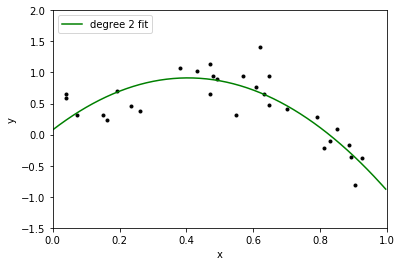

In [20]:
model = polynomial_regression(data_noise, deg=2)
print_coefficients(model)
plot_poly_predictions(data_noise,model)

## Addestro un polinomio di  grado 4

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


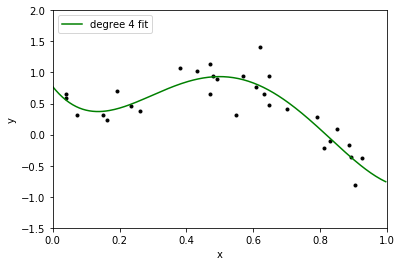

In [24]:
model = polynomial_regression(data_noise, deg=4)
print_coefficients(model)
plot_poly_predictions(data_noise,model)

# Addestro un polinomio di  grado 16

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


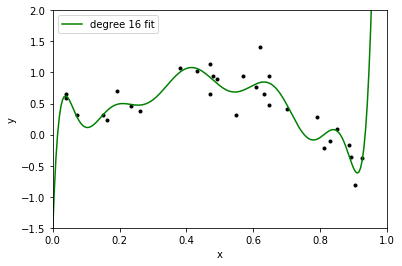

In [21]:
model = polynomial_regression(data_noise, deg=16)
print_coefficients(model)
plot_poly_predictions(data_noise,model)

Questi coefficienti sono *pazzeschi*!  

Ordine del 10^6.

# Ridge Regression con GraphLab Create (L2)

Definiamo nuovamente la definizione di regressione polinomiale per risolvere l'overfitting 

In [22]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', 
                                              l2_penalty=l2_penalty,
                                              validation_set=None,
                                              verbose=False)
    return model

## Scegliamo un valore di L2 molto piccolo

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


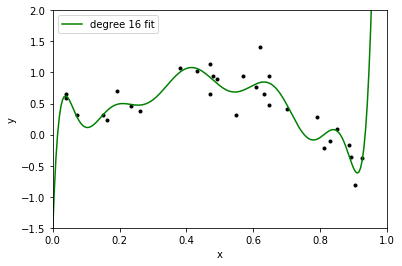

In [23]:
model_smallL2 = polynomial_ridge_regression(data_noise, deg=16, l2_penalty=1e-30)
print_coefficients(model)
plot_poly_predictions(data_noise,model_smallL2)

## Addestro un polinomio di grado 16 utilizzando un L2 molto grande 

Learned polynomial for degree 16:
          16           15           14            13            12
-0.01266 x  - 0.01155 x  - 0.01051 x  - 0.009542 x  - 0.008637 x 
             11            10            9           8            7
 - 0.007788 x  - 0.006988 x  - 0.006231 x - 0.00551 x - 0.004814 x
             6            5            4            3            2
 - 0.004133 x - 0.003451 x - 0.002752 x - 0.002017 x - 0.001252 x - 0.0005216 x + 0.4602


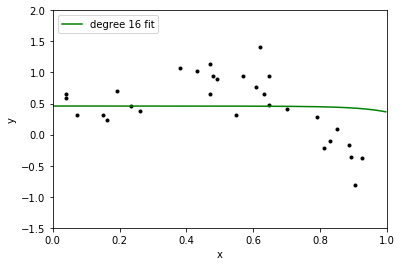

In [24]:
model_bigL2 = polynomial_ridge_regression(data_noise, deg=16, l2_penalty=10000)
print_coefficients(model_bigL2)
plot_poly_predictions(data_noise,model_bigL2)

## Consideriamo una sequenza crescente di valori di L2

Lambda = 1.00e-25
Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621




Lambda = 1.00e-10
Learned polynomial for degree 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159




Lambda = 1.00e-06
Learned polynomial for degree 16:
       16         15         14        13         12         11
329.1 x  - 356.4 x  - 264.2 x  + 33.8 x  + 224.7 x  + 210.8 x 
          10         9       8         7         6         5         4
 + 49.62 x  - 122.4 x - 178 x - 79.13 x + 84.89 x + 144.9 x + 5.123 x
          3         2
 - 156.9 x + 88.21 x - 14.82 x + 1.059




Lambda = 1.00e-03
Learned polynomial for degree 16:
       16         15         14         13         12          11
6.364 x  - 1.596 x  - 4.807 x  - 4.778 x  - 2.776 x  + 0.1238 x 
          10         9         8         7          6         5
 + 2.977 x  + 4.926 x + 5.203 x + 3.248 x - 0.9291 x - 6.011 x
          4         3         2
 - 8.395 x - 2.655 x + 9.861 x - 2.225 x + 0.5636




Lambda = 1.00e+02
Learned polynomial for degree 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416




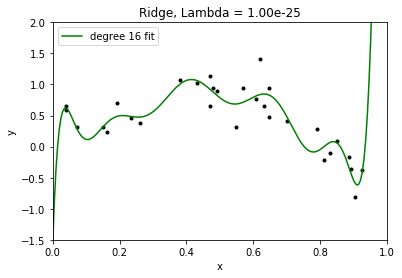

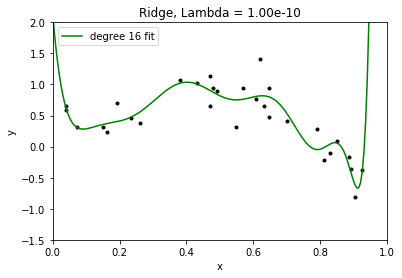

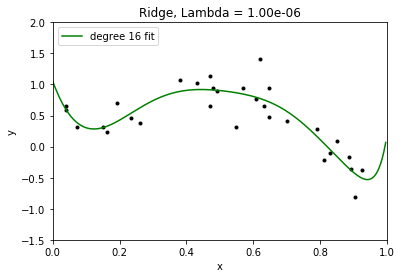

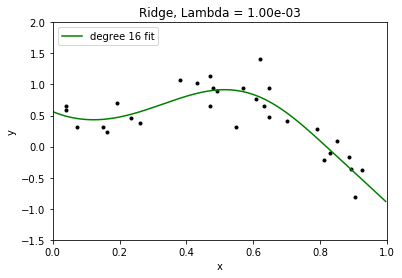

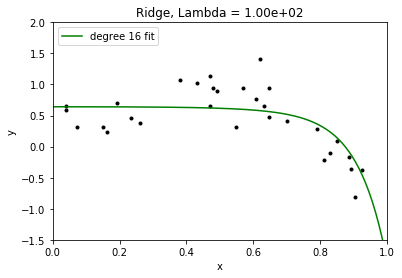

In [25]:
for l2_penalty in [1e-25,1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data_noise, deg=16, l2_penalty=l2_penalty)
    print 'Lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data_noise,model)
    plt.title('Ridge, Lambda = %.2e' % l2_penalty)

In [26]:
data

X1,Y
0.0395789449501,0.157655273307
0.0415680996791,0.165507315139
0.0724319480801,0.285691373172
0.150289044622,0.565596331074
0.161334144502,0.601467363864
0.191956312795,0.69457231828
0.232833917145,0.802417733663
0.259900980166,0.862203656218
0.380145814869,0.998739588797
0.432444723508,0.987388867937


## Scelta di un buon valore di L2 per il polinomio di grado 16 

# Leave One Out Cross Validation (LOO)

In [27]:
# LOO cross validation -- in output MAE
def loo(data, deg, l2_penalty_values):
    # Crea le feature polinomiali
    data = polynomial_features(data_noise, deg)
    
    # Creo num_folds blocchi (dove num_folds e' il numero delle osservazioni)
    num_folds = len(data)
    #Utilizzo la funzione di graphlab cross validation
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    #  Per ogni valore di l2_penalty, addestro il modello per ogni blocco e calcolo il MAE. 
    l2_penalty_mae = []
    min_mae = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mae = 0.0
        for train_set, validation_set in folds:
            # addestro il modello
            model = graphlab.linear_regression.create(train_set,
                                                      target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,
                                                      verbose=False)
            
            # predizione sul validation set 
            y_test_predicted = model.predict(validation_set)
            # calcolo dell'average error
            next_mae += (abs(y_test_predicted-validation_set['Y'])).sum()
        
        # salvo il valore di MAE per ogni l2_penalty
        next_mae = next_mae/num_folds
        l2_penalty_mae.append(next_mae)
        if min_mae is None or next_mae < min_mae:
            min_mae = next_mae
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mae,best_l2_penalty

RUN LOO cross validation

In [28]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)
l2_penalty_mae,best_l2_penalty = loo(data_noise, 16, l2_penalty_values)

In [29]:
l2_penalty_mae

[0.2590693056540595,
 0.2562890359000627,
 0.24774142457349319,
 0.263993663162069,
 0.29057059271372193,
 0.40730093249881516,
 0.41771819379288644,
 0.4180274207425712,
 0.4180360368581536,
 0.4180362766157623]

In [30]:
l2_penalty_values

array([  1.00000000e-04,   3.59381366e-03,   1.29154967e-01,
         4.64158883e+00,   1.66810054e+02,   5.99484250e+03,
         2.15443469e+05,   7.74263683e+06,   2.78255940e+08,
         1.00000000e+10])

### Plot results of estimating LOO for each value of lambda

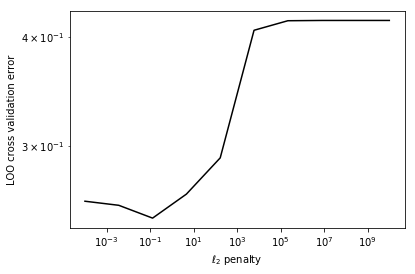

In [31]:
plt.plot(l2_penalty_values,l2_penalty_mae,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

Find the value of lambda, $\lambda_{\mathrm{CV}}$, that minimizes the LOO cross validation error, and plot resulting fit

In [32]:
best_l2_penalty

0.12915496650148839

Learned polynomial for degree 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918


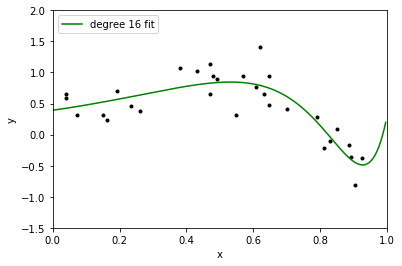

In [34]:
model = polynomial_ridge_regression(data_noise, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)
plot_poly_predictions(data_noise,model)